<a href="https://colab.research.google.com/github/sriya-nimma/CreditCardFraudDetection/blob/main/Triple_S_I310D_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Credit Card Fraud Detection Accuracy Model

## STEP 1: Data Loading and Pre-Processing

Import appropriate libraries and load dataset

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

df = pd.read_csv("creditcard_2023.csv", error_bad_lines=False)
df = df.reset_index()

#have to randomize the rows because in the initial dataframe, the first half is all 0s for output and the second half is all 1,
#this throws an exception when training the model


main_df = df.sample(frac=1, random_state=42)  # Setting random_state for reproducibility
main_df = main_df.reset_index(drop=True)
main_df = main_df.drop('index', axis = 1)

main_df.head()

<ipython-input-12-3b63f97a2aa2>:7: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("creditcard_2023.csv", error_bad_lines=False)


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,284050,0.207091,-0.217603,0.210944,-1.103458,1.034052,0.518079,0.817402,-0.172584,0.556610,...,-0.266099,-0.826459,0.047118,-0.823500,-0.680572,0.293200,-0.314041,-0.517221,15697.05,0.0
1,153537,-0.053523,-2.059827,-0.027278,0.898684,-0.033337,1.392890,0.889834,-0.194344,1.035711,...,0.200541,-0.396710,-1.023328,-0.123362,-1.043985,-0.303556,-0.520179,0.370256,21171.20,0.0
2,167795,1.666716,-0.417681,-0.013691,-0.378799,0.207648,-0.470131,0.498472,-0.211960,0.720204,...,0.012438,0.845206,-0.000838,1.009586,0.121775,-0.355828,-0.251798,-0.179177,17366.66,0.0
3,212178,1.605881,-0.274015,0.643570,0.630462,0.230954,0.599621,0.345508,-0.151909,0.099578,...,-0.174410,-0.389804,0.421612,-0.068483,-0.902787,-0.927658,-0.208091,-0.154104,12038.07,0.0
4,27612,-0.003158,-0.235189,1.462805,-1.304015,0.258209,-0.276640,0.728721,-0.184892,0.374953,...,-0.103594,-0.141328,-0.111566,0.881898,-0.649612,1.532672,-0.233107,0.177894,4781.54,0.0


## STEP 2: DATA CLEANING

Check for duplicate and null rows. Remove if found

In [13]:
#clean duplicate rows
duplicate_rows = main_df[df.duplicated()]
if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found:")
    print(duplicate_rows)

No duplicate rows found.


In [14]:
null_counts = main_df.isnull().sum()
print(null_counts)

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


 The data looks clean. There are no duplicates, there are no null values to deal with, and the data type is consistent throughout.

## Create training and testing datasets

In [15]:
train_df = main_df.iloc[:1000, :32]
test_df = main_df.iloc[1000:2000, :32]

train_df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,284050,0.207091,-0.217603,0.210944,-1.103458,1.034052,0.518079,0.817402,-0.172584,0.556610,...,-0.266099,-0.826459,0.047118,-0.823500,-0.680572,0.293200,-0.314041,-0.517221,15697.05,0.0
1,153537,-0.053523,-2.059827,-0.027278,0.898684,-0.033337,1.392890,0.889834,-0.194344,1.035711,...,0.200541,-0.396710,-1.023328,-0.123362,-1.043985,-0.303556,-0.520179,0.370256,21171.20,0.0
2,167795,1.666716,-0.417681,-0.013691,-0.378799,0.207648,-0.470131,0.498472,-0.211960,0.720204,...,0.012438,0.845206,-0.000838,1.009586,0.121775,-0.355828,-0.251798,-0.179177,17366.66,0.0
3,212178,1.605881,-0.274015,0.643570,0.630462,0.230954,0.599621,0.345508,-0.151909,0.099578,...,-0.174410,-0.389804,0.421612,-0.068483,-0.902787,-0.927658,-0.208091,-0.154104,12038.07,0.0
4,27612,-0.003158,-0.235189,1.462805,-1.304015,0.258209,-0.276640,0.728721,-0.184892,0.374953,...,-0.103594,-0.141328,-0.111566,0.881898,-0.649612,1.532672,-0.233107,0.177894,4781.54,0.0


## STEP 3: Determine which variables are mostly correlated if not all

Created a heatmap to help visualize which variables are mostly correlated to eachother

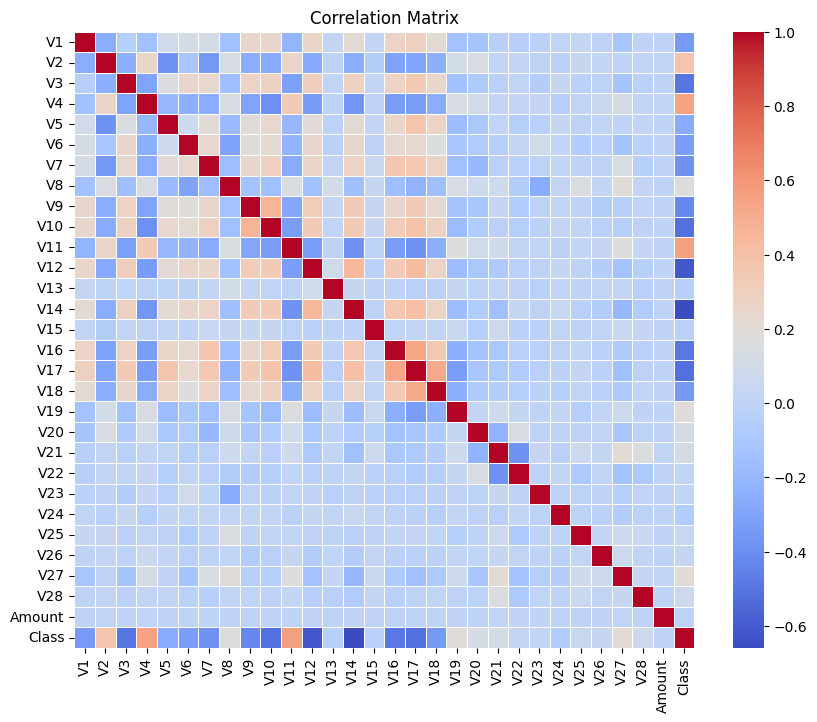

In [16]:
#correlation matrix

df_noID = main_df.drop('id', axis = 1)

correlation_matrix = df_noID.corr()

#visualize heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=False, cmap = 'coolwarm', fmt = '.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()



The correlation matrix does not show signs of concern of removing features that are highly correlated. However, V1 to V18 are more correlated than the other features.

Now let's check if there is any correlation between the transaction amount and whether it is fraudulent or not, so we can train our model based on that. To see this, we can make a scatterplot to see if there is a correlation between the two values.

Text(0.5, 1.0, "Does the Amount of the Transaction correlate to whether it's fradulent or not?")

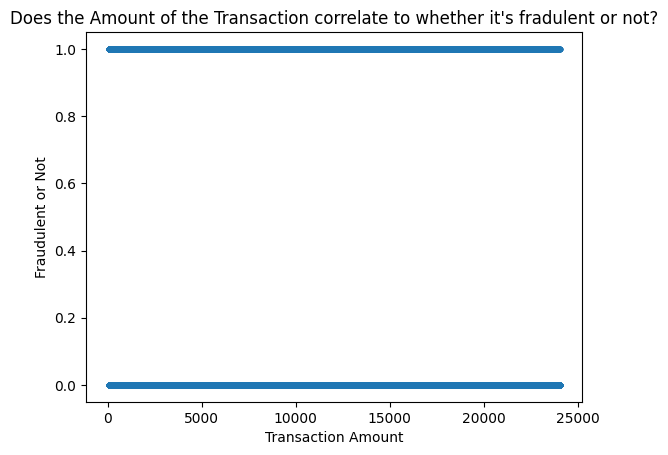

In [17]:
import scipy
from matplotlib import pyplot as plt

transaction_amount = main_df["Amount"]
fraud_or_not = main_df["Class"]

plt.scatter(transaction_amount,fraud_or_not,marker=".")

plt.xlabel("Transaction Amount")
plt.ylabel("Fraudulent or Not")

plt.title("Does the Amount of the Transaction correlate to whether it's fradulent or not?")

As the scatterplot has shown us, there is no visible correlation between the amount of the transaction and whether it is fraudulent or not, as transactions of the same amount have both been fraudlent and genuine. Therefore, we don't need to account for this when training our model since the dataset shows that 50% are fraud and 50% are not fraudulenet. This means that we don't have to deal with unbalance in the model.

## Training the Model

Determine which variables to train the data with for the model. This model is using all the variables from V1 to V28.

In [18]:

train_features = train_df.drop(['id', 'Class', 'Amount'], axis = 1)
train_labels = train_df["Class"]

train_features.head()

train_labels.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Class, dtype: float64

## Define the Models

Defined a logistic regression, MLP, Decision Tree, and Random Forest classifer

In [20]:
# Define our models
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


lr_classifier = LogisticRegression(solver='lbfgs',max_iter=150)
mlp_classifier = MLPClassifier(solver='lbfgs', max_iter=150)
dt_classifier = DecisionTreeClassifier(random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=150, random_state=42)

# train our models
lr_classifier.fit(train_features.to_numpy(),train_labels.to_numpy())
mlp_classifier.fit(train_features.to_numpy(),train_labels.to_numpy())
dt_classifier.fit(train_features.to_numpy(), train_labels.to_numpy())
rf_classifier.fit(train_features.to_numpy(), train_labels.to_numpy())


RandomForestClassifier(n_estimators=150, random_state=42)

## Test the Model On Different Classifiers

Tested the model and ouputted the accuracy score results.

In [21]:
from sklearn.metrics import accuracy_score

test_inputs = test_df.drop(['id','Class','Amount'], axis = 1)
y_actual = test_df["Class"]

#logistic classifer
y_predicted_lr = lr_classifier.predict(test_inputs.to_numpy())
lr_accuracy_score = accuracy_score(y_predicted_lr,y_actual)


#mlp classifier
y_predicted_mlp = mlp_classifier.predict(test_inputs.to_numpy())
mlp_accuracy_score = accuracy_score(y_predicted_mlp,y_actual)


#decision tree
y_predicted_dt = dt_classifier.predict(test_inputs.to_numpy())
dt_accuracy_score = accuracy_score(y_predicted_dt, y_actual)


#random forest
y_predicted_rf = rf_classifier.predict(test_inputs.to_numpy())
rf_accuracy_score = accuracy_score(y_predicted_rf, y_actual)


print (f"Accuracy of the Logistic Classifier (V1-V28) = {lr_accuracy_score}")
print (f"Accuracy of the MLP Classifier (V1-V28) = {mlp_accuracy_score}")
print(f"Accuracy of the Decision Tree Classifier (V1-V28) = {dt_accuracy_score}")
print(f"Accuracy of the Random Forest Classifier (V1-V28) = {rf_accuracy_score}")

Accuracy of the Logistic Classifier (V1-V28) = 0.98
Accuracy of the MLP Classifier (V1-V28) = 0.955
Accuracy of the Decision Tree Classifier (V1-V28) = 0.973
Accuracy of the Random Forest Classifier (V1-V28) = 0.985


## Results: (Results May Vary Each Run)

**Logistic Classifier:**

Accuracy: 96.3%

The logistic classifier correctly predicted the class for 96.3% of the instances. This is a relatively high accuracy and it suggests that the logistic regression model is performing well on the given features.

**MLP Classifier**

Accuracy: 97.2%

The MLP Classifier achieved a 97.2% accuracy. This classifier achieved the highest score, meaning it is the most efficient in identifying fradulent and non-fraudulent transactions

**Decision Tree Classifier**

Accuracy: 94.3%

The decision tree predicted a 94.3% accuracy. This model is reasonable and decision trees are known for their interpretability.

**Random Forest Classifier**

Accuracy: 96.5%

The random forest classifier acheived an accuracy of 96.5%. This was expected because random forests provide high accuracy by combining multiple decision trees.

## Another Modeling Test Part 2

Test the accuracy of the model with only variables V1 to V18 since the Heatmap shows those are the most closely correlated

In [22]:
train_features2 = train_df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
                            'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18']]
train_labels2 = train_df["Class"]

train_features2.head()
train_labels2.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Class, dtype: float64

## Define and Train Model Part 2

In [23]:
# Now let's define our models
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


lr_classifier = LogisticRegression(solver='lbfgs',max_iter=150)
mlp_classifier = MLPClassifier(solver='lbfgs',max_iter=150)
dt_classifier = DecisionTreeClassifier(random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=150, random_state=42)

# train our models
lr_classifier.fit(train_features2.to_numpy(),train_labels2.to_numpy())
mlp_classifier.fit(train_features2.to_numpy(),train_labels2.to_numpy())
dt_classifier.fit(train_features2.to_numpy(), train_labels2.to_numpy())
rf_classifier.fit(train_features2.to_numpy(), train_labels2.to_numpy())

RandomForestClassifier(n_estimators=150, random_state=42)

Test the model with the new variables (V1 to V18) since the heatmap showed that these features are the most correlated.

## Accuracy Results Based on Different Classifiers

In [24]:
from sklearn.metrics import accuracy_score

test_inputs = test_df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
                       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18']]
y_actual = test_df["Class"]

#logistic classifer
y_predicted_lr = lr_classifier.predict(test_inputs.to_numpy())
lr_accuracy_score = accuracy_score(y_predicted_lr,y_actual)


#mlp classifier
y_predicted_mlp = mlp_classifier.predict(test_inputs.to_numpy())
mlp_accuracy_score = accuracy_score(y_predicted_mlp,y_actual)


#decision tree
y_predicted_dt = dt_classifier.predict(test_inputs.to_numpy())
dt_accuracy_score = accuracy_score(y_predicted_dt, y_actual)


#random forest
y_predicted_rf = rf_classifier.predict(test_inputs.to_numpy())
rf_accuracy_score = accuracy_score(y_predicted_rf, y_actual)


print (f"Accuracy of the Logistic Classifier (V1-V18) = {lr_accuracy_score}")
print (f"Accuracy of the MLP Classifier (V1-V18) = {mlp_accuracy_score}")
print(f"Accuracy of the Decision Tree Classifier (V1-V18) = {dt_accuracy_score}")
print(f"Accuracy of the Random Forest Classifier (V1-V18) = {rf_accuracy_score}")

Accuracy of the Logistic Classifier (V1-V18) = 0.981
Accuracy of the MLP Classifier (V1-V18) = 0.971
Accuracy of the Decision Tree Classifier (V1-V18) = 0.97
Accuracy of the Random Forest Classifier (V1-V18) = 0.985


## Class Accuracy Test

In [25]:
from sklearn.metrics import classification_report

# Logistic Classifier
print("Logistic Classifier:")
print(classification_report(y_actual, y_predicted_lr))

# MLP Classifier
print("MLP Classifier:")
print(classification_report(y_actual, y_predicted_mlp))

# Decision Tree Classifier
print("Decision Tree Classifier:")
print(classification_report(y_actual, y_predicted_dt))

# Random Forest Classifier
print("Random Forest Classifier:")
print(classification_report(y_actual, y_predicted_rf))


Logistic Classifier:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       892
         1.0       1.00      0.82      0.90       108

    accuracy                           0.98      1000
   macro avg       0.99      0.91      0.95      1000
weighted avg       0.98      0.98      0.98      1000

MLP Classifier:
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       892
         1.0       0.94      0.78      0.85       108

    accuracy                           0.97      1000
   macro avg       0.96      0.89      0.92      1000
weighted avg       0.97      0.97      0.97      1000

Decision Tree Classifier:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       892
         1.0       0.89      0.82      0.86       108

    accuracy                           0.97      1000
   macro avg       0.93      0.91      0.92      1000
weighted av

Based on the classification reports, the logisitc and random forest classifiers had the highest f1-score accuracies.

##Results:

The Random Forest had the highest accuracy. Logistic and MLP classifiers were also highly accurate when using variables V1 to V18. The decision tree had the lowest score as its accuracy and the MLP accuracy decreased compared to the other test with features V1 to V28.

## Conclusion:

We did two tests. The first test was on the features V1 to V28 and the results showed that the Random Forest Classifier has the highest accuracy. The MLP Classifier also showed high accuracy. The Logistic Classifier and the Decision Tree Classifier were slightly lower but it still demonstrated a reasonable performance.

The second test was on features V1 to V18 because the heatmap showed that these were the most correlated features. Overall, the Logistic, MLP, and Decision Tree Classifiers did better than the first test. However, the Random Forest was slightly less than the first test. The MLP Classifier did the best with the highest accuracy while the Logistic and Decision Tree Classifiers were slightly lower, but still reasonable.

Overall, accuracy is just one metric to determine a model's performance. It is important to consider for future tests to explore additional metrics such as precision, recall, F1 score, and confusion matrices to get a better in depth understanding of the model, especially if there are imbalances with the classes in the dataset. Since the classes were split evenly in half in the dataset, we could suffice with just using accuracy as the metric. Another thing to consider for the future is whether misclassification of costs can influence the models. Some limitations with accuracy is that it is sensitive to data pre-processing, meaning that different pre-processing techiques could lead to different accuracy scores. Another limitation is that it may not fully reflect the real world. For instance, a high accuracy in identifying non-fraudulent cases and a low accuracy in detecting fraudulent cases is not useful in fraud detection.